In [1]:
!git clone https://github.com/mayankified/wce-dataset.git

Cloning into 'wce-dataset'...
remote: Enumerating objects: 12384, done.
remote: Total 12384 (delta 0), reused 0 (delta 0), pack-reused 12384 (from 2)
Receiving objects: 100% (12384/12384), 288.23 MiB | 39.21 MiB/s, done.
Resolving deltas: 100% (1294/1294), done.
Updating files: 100% (15815/15815), done.


In [2]:
import torch
import pathlib
import PIL
import sklearn

from torch.utils.data import Dataset
from pathlib import Path
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
path = "/kaggle/working/wce-dataset/WCEBleedGen (updated)"
data_dir = Path(path)

In [4]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f"There are {len(dirname)} directories and {len(filename)} files in {dirpath}")

In [5]:
bleeding_data_set_dir = data_dir / "bleeding/Images"
bleeding_data_set_dir

PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images')

In [6]:
non_bleeding_data_set_dir = data_dir / "non-bleeding/images"
non_bleeding_data_set_dir

PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images')

In [7]:
bleeding_images = list(bleeding_data_set_dir.glob("*.png"))
len(bleeding_images)

1309

In [8]:
non_bleeding_images = list(non_bleeding_data_set_dir.glob("*.png"))
len(non_bleeding_images)

1309

In [9]:
non_bleeding_data_set_dir.parent.stem

'non-bleeding'

In [10]:
bleeding_label = [bleeding_data_set_dir.parent.stem]*len(bleeding_images)
bleeding_train, bleeding_test, label_train, label_test = train_test_split(bleeding_images, bleeding_label, test_size=0.2, random_state=42)

In [11]:
bleeding_train[:10], label_train[:10]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (336).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (967).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (271).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (242).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (148).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (1083).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (428).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (114).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (784).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (921).png')],
 ['bleeding',
  'bleeding',


In [12]:
non_bleeding_label = [non_bleeding_data_set_dir.parent.stem]*len(non_bleeding_images)
non_bleeding_train, non_bleeding_test, label_train, label_test = train_test_split(non_bleeding_images, non_bleeding_label, test_size=0.2, random_state=42)

In [13]:
non_bleeding_train[:10], label_train[:10]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (336).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (967).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (271).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (242).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (148).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1083).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (428).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (114).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (784).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (9

In [14]:
label_split = {}
label_split['train'] = bleeding_train + non_bleeding_train
label_split['test'] = bleeding_test + non_bleeding_test

In [15]:
label_split["train"][:5],label_split['train'][-5:]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (336).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (967).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (271).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (242).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (148).png')],
 [PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1026).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (962).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (130).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1223).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (367).png')])

In [16]:
label_split["test"][:5],label_split['test'][-5:]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (806).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (84).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (915).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (67).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (247).png')],
 [PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1206).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1086).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (554).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (330).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (347).png')])

In [17]:
list(label_split["test"][0].parents)[0].parent.stem

'bleeding'

In [18]:
# Create target directory path
target_dir_name = f"/kaggle/working/DATA"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '/kaggle/working/DATA'


In [19]:
import shutil

for image_split in label_split.keys():
    for image_path in label_split[str(image_split)]:
        dest_dir = target_dir / image_split / list(image_path.parents)[0].parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (336).png to /kaggle/working/DATA/train/bleeding/img- (336).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (967).png to /kaggle/working/DATA/train/bleeding/img- (967).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (271).png to /kaggle/working/DATA/train/bleeding/img- (271).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (242).png to /kaggle/working/DATA/train/bleeding/img- (242).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (148).png to /kaggle/working/DATA/train/bleeding/img- (148).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (1083).png to /kaggle/working/DATA/train/bleeding/img- (1083).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images

In [20]:
walk_through_dir(target_dir)

There are 2 directories and 0 files in /kaggle/working/DATA
There are 2 directories and 0 files in /kaggle/working/DATA/test
There are 0 directories and 262 files in /kaggle/working/DATA/test/non-bleeding
There are 0 directories and 262 files in /kaggle/working/DATA/test/bleeding
There are 2 directories and 0 files in /kaggle/working/DATA/train
There are 0 directories and 1047 files in /kaggle/working/DATA/train/non-bleeding
There are 0 directories and 1047 files in /kaggle/working/DATA/train/bleeding


In [21]:
import torch
import torchvision
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, ops
from pathlib import Path
from typing import List, Dict, Tuple
from collections import defaultdict
from matplotlib import patches, text, patheffects
from sklearn.metrics import classification_report
from PIL import Image

try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
     

In [22]:
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [23]:
train_transform = transforms.Compose([
    transforms.Resize(size=(100,100)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0,0,0],std=[1,1,1],inplace=True)
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(100,100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0,0,0],std=[1,1,1],inplace=True)
])
     


In [24]:

data_dir = Path("/kaggle/working/DATA")

train_dir = data_dir / "train"
test_dir = data_dir / "test"

train_dataset = datasets.ImageFolder(
    root = train_dir,
    transform=train_transform
)

test_dataset = datasets.ImageFolder(
    root=test_dir,
    transform=test_transforms
)

train_dataset, test_dataset
     

(Dataset ImageFolder
     Number of datapoints: 2094
     Root location: /kaggle/working/DATA/train
     StandardTransform
 Transform: Compose(
                Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0, 0, 0], std=[1, 1, 1])
            ),
 Dataset ImageFolder
     Number of datapoints: 524
     Root location: /kaggle/working/DATA/test
     StandardTransform
 Transform: Compose(
                Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0, 0, 0], std=[1, 1, 1])
            ))

In [25]:
train_dataset.class_to_idx

{'bleeding': 0, 'non-bleeding': 1}

In [26]:
train_img, train_label = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n{train_img}")
print(f"Image shape: {train_img.shape}")
print(f"Image datatype: {train_img.dtype}")
print(f"Image label: {train_label}")
print(f"Label datatype: {type(train_label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 100, 100])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


In [27]:
class_name = train_dataset.classes
class_name
     

['bleeding', 'non-bleeding']

(-0.5, 99.5, 99.5, -0.5)

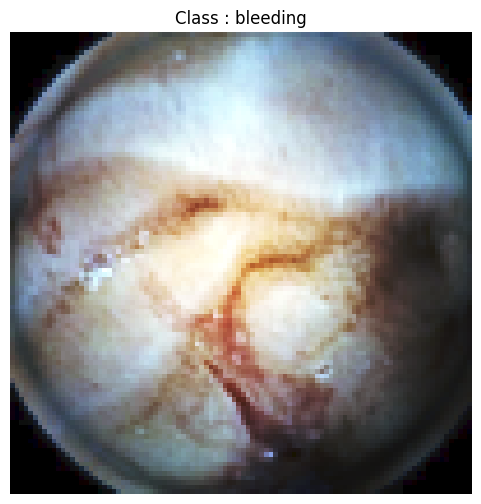

In [28]:
import matplotlib.pyplot as plt

permute_img = train_img.permute(1,2,0)
fig = plt.figure(figsize=(6,6))

plt.imshow(permute_img)
plt.title(f"Class : {class_name[train_label]}")
plt.axis(False)

In [29]:
import os

BATCH_SIZE = 128
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_dataset,
                              shuffle=True,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_dataset,
                             shuffle=False,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS)


In [30]:
train_dataloader, test_dataloader
     

(<torch.utils.data.dataloader.DataLoader at 0x7ebea6dfb850>,
 <torch.utils.data.dataloader.DataLoader at 0x7ebe8f480340>)

In [31]:
batch_img, batch_label = next(iter(train_dataloader))
batch_img.shape, batch_label.shape
     


(torch.Size([128, 3, 100, 100]), torch.Size([128]))

In [32]:
batch_img


tensor([[[[0.0235, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0235, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0235, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0078],
          [0.0039, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0078],
          [0.0039, 0.0000, 0.0000,  ..., 0

In [33]:
batch_label

tensor([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0])

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
class WCEBleedGen(nn.Module):

  def __init__(self) -> None:
    super().__init__()

    self.layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,padding='same'),
        nn.BatchNorm2d(num_features=8),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,padding='same'),
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer_3 = nn.Sequential(
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding='same'),
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer_4 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=32*12*12,out_features=32),
        nn.Linear(in_features=32, out_features=2)
    )

  def forward(self, x : torch.Tensor) -> torch.Tensor:

    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))


In [36]:
model = WCEBleedGen().to(device)

model.eval()
with torch.inference_mode():
  print(model(batch_img.to(device)).shape)

torch.Size([128, 2])


In [37]:
summary(model, input_size=[1, 3, 100, 100])

Layer (type:depth-idx)                   Output Shape              Param #
WCEBleedGen                              [1, 2]                    --
├─Sequential: 1-1                        [1, 8, 50, 50]            --
│    └─Conv2d: 2-1                       [1, 8, 100, 100]          224
│    └─BatchNorm2d: 2-2                  [1, 8, 100, 100]          16
│    └─ReLU: 2-3                         [1, 8, 100, 100]          --
│    └─MaxPool2d: 2-4                    [1, 8, 50, 50]            --
├─Sequential: 1-2                        [1, 16, 25, 25]           --
│    └─Conv2d: 2-5                       [1, 16, 50, 50]           1,168
│    └─BatchNorm2d: 2-6                  [1, 16, 50, 50]           32
│    └─ReLU: 2-7                         [1, 16, 50, 50]           --
│    └─MaxPool2d: 2-8                    [1, 16, 25, 25]           --
├─Sequential: 1-3                        [1, 32, 12, 12]           --
│    └─Conv2d: 2-9                       [1, 32, 25, 25]           4,640
│    └─B

In [38]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimiser,step_size=1,gamma=0.9)

In [39]:
def train_step(train_dataloader : torch.utils.data.DataLoader,
          model : nn.Module,
          loss_fn : nn.Module,
          optimiser : torch.optim.Optimizer,
          ):

  # Put the model in training mode
  model.train()

  # metrics to calculate
  training_loss = 0
  training_accuracy = 0

  for batch, (X,y) in enumerate(train_dataloader):

    # put data on correct device
    X = X.to(device)
    y = y.to(device)

    # make a prediction
    y_pred = model(X) #Logits
    y_pred_label = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

    # Calculate loss and accuracy
    loss = loss_fn(y_pred, y)
    training_loss += loss
    training_accuracy += (y==y_pred_label).sum().item()/len(y)

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

  # Calculate training loss and accuracy per batch
  training_loss/=len(train_dataloader)
  training_accuracy/=len(train_dataloader)

  return training_loss.item(), training_accuracy
     

In [40]:
def test_step(test_dataloader : torch.utils.data.DataLoader,
          model : nn.Module,
          loss_fn : nn.Module,
          ):

  #Put the model in evaluation mode
  model.eval()

  test_loss = 0
  test_accuracy = 0

  with torch.inference_mode():

    for batch, (X,y) in enumerate(test_dataloader):

      # Put the data on right device
      X = X.to(device)
      y = y.to(device)

      test_pred = model(X) # Logits
      test_pred_label = torch.argmax(torch.softmax(test_pred, dim=1), dim=1)

      test_loss += loss_fn(test_pred, y)
      test_accuracy += (test_pred_label==y).sum().item()/len(y)

    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)

  return test_loss.item(), test_accuracy
    

In [41]:
from tqdm.auto import tqdm
from collections import defaultdict

def train(model : nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader,
          loss_fn : nn.Module,
          optimiser : torch.optim.Optimizer,
          epochs : int = 5
          ):

  result = defaultdict(list)

  for epoch in tqdm(range(epochs)):

    # train and test step
    train_loss, train_acc = train_step(train_dataloader=train_dataloader,
                                       model = model,
                                       loss_fn = loss_fn,
                                       optimiser = optimiser)
    test_loss, test_acc = test_step(test_dataloader=test_dataloader,
                                    model = model,
                                    loss_fn = loss_fn)

    # Store the results
    result['train_loss'].append(train_loss)
    result['test_loss'].append(test_loss)
    result['train_accuracy'].append(train_acc)
    result['test_accuracy'].append(test_acc)

    scheduler.step()

    # print what's happening
    print(f"Epoch : {epoch} | training loss = {train_loss} | test loss = {test_loss} | training accuracy = {train_acc} | test accuracy = {test_acc}")

  return result

In [42]:
from timeit import default_timer as timer

epochs = 50

start_time = timer()
result = train(model = model,
               train_dataloader = train_dataloader,
               test_dataloader = test_dataloader,
               loss_fn = loss_fn,
               optimiser = optimiser,
               epochs = epochs
               )

end_time = timer()
print(f"Total time taken for training : {end_time - start_time} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch : 0 | training loss = 0.6409732699394226 | test loss = 0.6405153274536133 | training accuracy = 0.673113810741688 | test accuracy = 0.7911458333333333
Epoch : 1 | training loss = 0.48112455010414124 | test loss = 0.3526615500450134 | training accuracy = 0.7738770780051151 | test accuracy = 0.859375
Epoch : 2 | training loss = 0.42439529299736023 | test loss = 0.32941555976867676 | training accuracy = 0.8037484015345269 | test accuracy = 0.909375
Epoch : 3 | training loss = 0.3930835425853729 | test loss = 0.4071400761604309 | training accuracy = 0.8246283567774936 | test accuracy = 0.8161458333333333
Epoch : 4 | training loss = 0.3892141878604889 | test loss = 0.2422877997159958 | training accuracy = 0.8330003196930946 | test accuracy = 0.9328125
Epoch : 5 | training loss = 0.34215614199638367 | test loss = 0.19396565854549408 | training accuracy = 0.8553188938618925 | test accuracy = 0.9390625
Epoch : 6 | training loss = 0.3291865587234497 | test loss = 0.16849814355373383 | tra

In [43]:
result

defaultdict(list,
            {'train_loss': [0.6409732699394226,
              0.48112455010414124,
              0.42439529299736023,
              0.3930835425853729,
              0.3892141878604889,
              0.34215614199638367,
              0.3291865587234497,
              0.2985227406024933,
              0.28982746601104736,
              0.275996595621109,
              0.26985424757003784,
              0.25019389390945435,
              0.24336548149585724,
              0.23021510243415833,
              0.21384823322296143,
              0.22200468182563782,
              0.2116985023021698,
              0.19831112027168274,
              0.2140059769153595,
              0.19363117218017578,
              0.1691177636384964,
              0.18907274305820465,
              0.19642367959022522,
              0.18511241674423218,
              0.18627820909023285,
              0.1862759292125702,
              0.17682646214962006,
              0.1775372326374054,


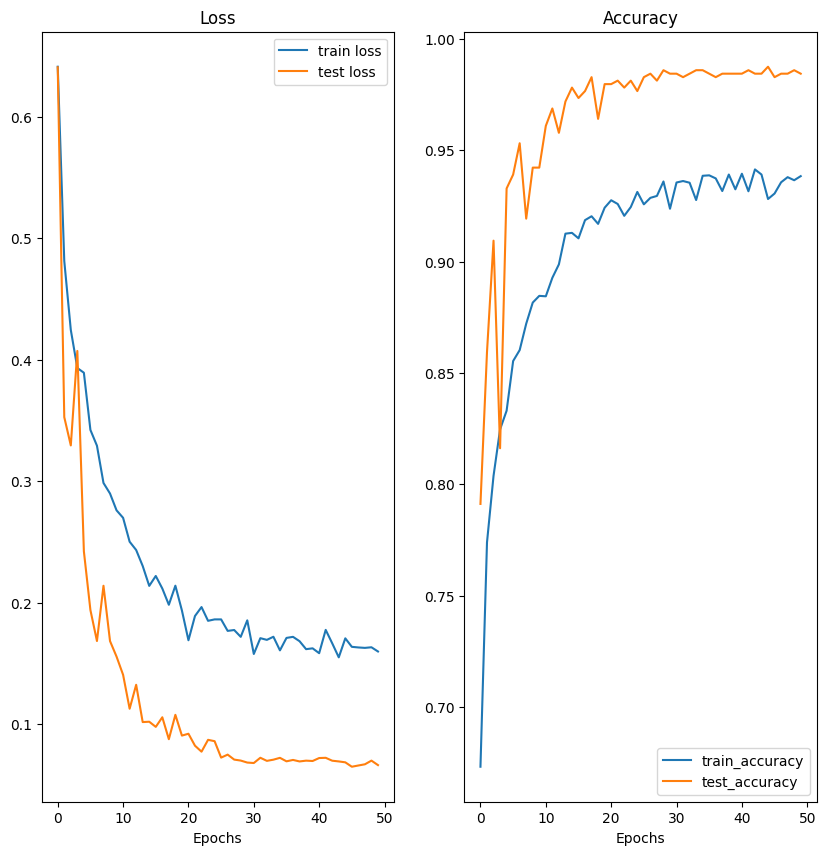

In [44]:
    import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), result['train_loss'], label='train loss')
plt.plot(range(epochs), result['test_loss'], label='test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), result['train_accuracy'], label='train_accuracy')
plt.plot(range(epochs), result['test_accuracy'], label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();


In [45]:
torch.save(model.state_dict(), "/kaggle/working/Model")

In [46]:
model.load_state_dict(torch.load("/kaggle/working/Model", weights_only=True))


<All keys matched successfully>

In [47]:
y_pred = []
y_true = []

model.eval()
with torch.inference_mode():

  for images, labels in test_dataset:

    y_pred_logits = model(images.unsqueeze(dim=0).to(device))
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)

    y_pred.append(y_pred_labels.item())
    y_true.append(labels)


print(classification_report(y_pred = y_pred, y_true = y_true))
     

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       262
           1       0.97      0.99      0.98       262

    accuracy                           0.98       524
   macro avg       0.98      0.98      0.98       524
weighted avg       0.98      0.98      0.98       524



In [48]:
validation_test_1_path = Path("/kaggle/working/wce-dataset/WCEBleedGen_Test/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1")
validation_test_1_images = list(validation_test_1_path.glob("*.png"))

len(validation_test_1_images)
     

49

In [49]:
idx_to_class = {}
for key, val in train_dataset.class_to_idx.items():

  idx_to_class[val] = key

idx_to_class

{0: 'bleeding', 1: 'non-bleeding'}

In [50]:
validation_transform = transforms.Compose([transforms.Resize(size=(100,100)),
                                           transforms.ToTensor()])

test_1_results = defaultdict(list)

model.eval()
with torch.inference_mode():
  for image in validation_test_1_images:

    test_1_results['Image name'].append(image.stem)

    img = Image.open(image)
    transformed_img = validation_transform(img).unsqueeze(dim=0).to(device)

    pred_label = torch.argmax(torch.softmax(model(transformed_img), dim=1), dim=1).item()
    test_1_results['Predicted Class label'].append(pred_label)

test_1_results_df = pd.DataFrame.from_dict(test_1_results)
test_1_results_df['Predicted Class label'] = test_1_results_df['Predicted Class label'].map(idx_to_class)
test_1_results_df

,Image name,Predicted Class label
0,A0047,non-bleeding
1,A0018,non-bleeding
2,A0039,bleeding
3,A0016,non-bleeding
4,A0025,non-bleeding
5,A0044,non-bleeding
6,A0006,non-bleeding
7,A0000,bleeding
8,A0045,non-bleeding
9,A0030,non-bleeding


In [51]:
validation_test_2_path = Path("/kaggle/working/wce-dataset/WCEBleedGen_Test/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 2")
validation_test_2_images = list(validation_test_2_path.glob("*.png"))

len(validation_test_2_images)
     

515

In [52]:

test_2_results = defaultdict(list)

model.eval()
with torch.inference_mode():
  for image in validation_test_2_images:

    test_2_results['Image name'].append(image.stem)

    img = Image.open(image)
    transformed_img = validation_transform(img).unsqueeze(dim=0).to(device)

    pred_label = torch.argmax(torch.softmax(model(transformed_img), dim=1), dim=1).item()
    test_2_results['Predicted Class label'].append(pred_label)

test_2_results_df = pd.DataFrame.from_dict(test_2_results)
test_2_results_df['Predicted Class label'] = test_2_results_df['Predicted Class label'].map(idx_to_class)
test_2_results_df
     

,Image name,Predicted Class label
0,A0433,bleeding
1,A0421,non-bleeding
2,A0542,non-bleeding
3,A0379,bleeding
4,A0264,bleeding
...,...,...
510,A0182,non-bleeding
511,A0440,non-bleeding
512,A0230,non-bleeding
513,A0252,bleeding


In [53]:
test_1_results_df.to_excel(excel_writer="/kaggle/working/Test 1 Dataset.xlsx")
test_2_results_df.to_excel(excel_writer="/kaggle/working/Test 2 Dataset.xlsx")
     